# Finding the Best Markets to Advertise In
We will assume that we are working for an e-learning company who specialize in courses on programming. We will analyze data to find which markets are the best to advertise our service in.

The company we represent focuses on domains such as web and mobile developement, game development, data science etc.

In [1]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## read in dataset
advertisement = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")

C:\Users\araf7\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
advertisement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
advertisement.shape

(18175, 136)

In [5]:
advertisement.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
advertisement.columns.tolist()

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

For the company we represent, we would like to focus on areas of the individual such as:

- Age
- Country
- Income
- Time they spend learning

We focus on these areas because our advertising is directed to a population of new coders that are interested in our subjects. We have to figure out statistics such as:

- Where these new coders are located
- The area with the greatest number of new coders
- How much money these new coders can spend on our courses

We are using a ready made data set from FreeCodeCamp, a popular website where new coders can learn different programming languages. This data set already has a lot of entries, making it it easier for us to analyze the data and decide how we should advertise. 

This dataset is a 2017 new coders survey, asking new coders information about their lifestyle and interests, using this dataset will be helpful for our advertisement.

## Checking for Representativity
We should check the dataset on whether each individual would like to work a job related to one of our programs

In [7]:
(advertisement['JobRoleInterest'].value_counts(normalize=True)*100)

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

We can see that individuals are interested in more than one subject. This sample is still representative nonetheless. We can also notice that there are a lot of individuals interested in web and mobile developement.

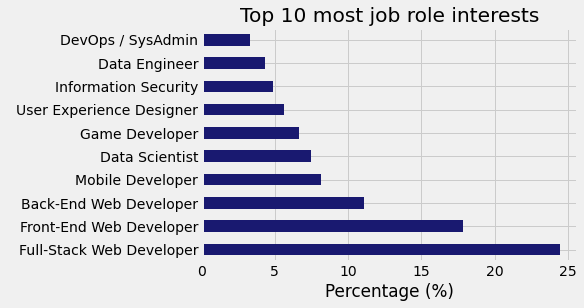

In [8]:
## select only the first value for multi-interests, and drop null values
top10 = advertisement['JobRoleInterest'].dropna().str.split(',').str[0]
top10 = (top10.value_counts(normalize=True).head(10))*100
plt.style.use('fivethirtyeight')
top10.plot.barh(color='#191970')
plt.title('Top 10 most job role interests')
plt.xlabel('Percentage (%)')
plt.show()

We can now see that the job interests that are most sought out by these new coders are in the web developement, mobile developement, game developement, and data science realm. This graph excludes all the following interests for individuals after their first entry, which may change the results of this graph.

## Locations and Densities
We have the locations for most individuals, allowing us to formulate where most new coders come from in terms of their country of residence.

In [9]:
## Dropping rows where participants did not answer what role they are interested in
ad_new = advertisement[advertisement['JobRoleInterest'].notnull()]
## Create absolute and relative freq tables
top_countries = pd.DataFrame({'Absolute':ad_new['CountryLive'].value_counts(), 'Relative (%)':round(ad_new['CountryLive'].value_counts(normalize=True)*100,3)})
top_countries

,Absolute,Relative (%)
United States of America,3125,45.700
India,528,7.722
United Kingdom,315,4.607
Canada,260,3.802
Poland,131,1.916
...,...,...
Liberia,1,0.015
Papua New Guinea,1,0.015
Guadeloupe,1,0.015
Gibraltar,1,0.015


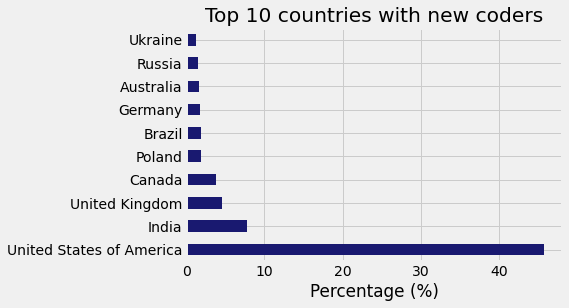

In [10]:
top_countries['Relative (%)'].head(10).plot.barh(color='#191970')
plt.style.use('fivethirtyeight')
plt.title('Top 10 countries with new coders')
plt.xlabel('Percentage (%)')
plt.show()

We can see that the USA and India have the largest amount of new coders, with the United states making up almost half of the population. Although this is a big factor on figuring out where we should advertise, we should also take note of other factors which may cause us to advertise in another market such as overall income and willingness to spend on courses.

## Spending money on Courses
We are interested in seeing how much individuals are willing to spend on programs, our program costs 59 dollars a month for reference. Let's focus on the four major countries in the dataset: USA, India, UK, and Canada since they are the ones whom contain most new coders. These countries also have a lot of English speakers, which is important since our course in in English.

In [11]:
## Find monthly spending of individuals (money they spent on coding divided by the months they spent coding)
## Avoid dividing by 0 months
ad_new['MonthsProgramming'].replace(0,1,inplace=True)
ad_new['Monthly_spend'] = ad_new['MoneyForLearning'] / ad_new['MonthsProgramming']
ad_new['Monthly_spend']

C:\Users\araf7\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\araf7\AppData\Local\Temp/ipykernel_15704/2723652969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_new['Monthly_spend'] = ad_new['MoneyForLearning'] / ad_new['MonthsProgramming']


1           13.333333
2          200.000000
3            0.000000
4            0.000000
6            0.000000
             ...     
18161        0.000000
18162        0.000000
18163             NaN
18171    10000.000000
18174             NaN
Name: Monthly_spend, Length: 6992, dtype: float64

In [12]:
## Find null values
ad_new['Monthly_spend'].isnull().value_counts()

False    6317
True      675
Name: Monthly_spend, dtype: int64

In [13]:
ad_new.dropna(subset=['CountryLive', 'Monthly_spend'],inplace=True)

C:\Users\araf7\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [40]:
## group data by country
country = ad_new.groupby(['CountryLive'])
count_per_month = pd.DataFrame({'country':country['CountryLive'].first(),'mean':country['Monthly_spend'].mean()})
count_per_month

,country,mean
CountryLive,,
Afghanistan,Afghanistan,0.000000
Albania,Albania,7.111111
Algeria,Algeria,0.000000
Angola,Angola,116.666667
Anguilla,Anguilla,0.000000
...,...,...
Venezuela,Venezuela,11.923077
Vietnam,Vietnam,243.324074
Virgin Islands (USA),Virgin Islands (USA),60.416667


In [48]:
top_4 = count_per_month[(count_per_month['country']=='United States of America')|
                        (count_per_month['country']=='India')|
                        (count_per_month['country']=='United Kingdom')|
                        (count_per_month['country']=='Canada')]
top_4.sort_values(by='mean',ascending=False)

,country,mean
CountryLive,,
United States of America,United States of America,227.997996
India,India,135.100982
Canada,Canada,113.510961
United Kingdom,United Kingdom,45.534443


Surprisingly, on average people from india spend more on courses compared to Canada and the UK. This is off considering the economic standards when comparing the three countries. Things that may explain this information are:
- Individuals in India are actually willing to spend more on programming services
- Heavy outliers causing the average to increase/ decrease for the countries
- Little data from the countries causing insufficient information
- Possible currency exchange issues

## Finding outliers
Let's figure out what is affecting this data

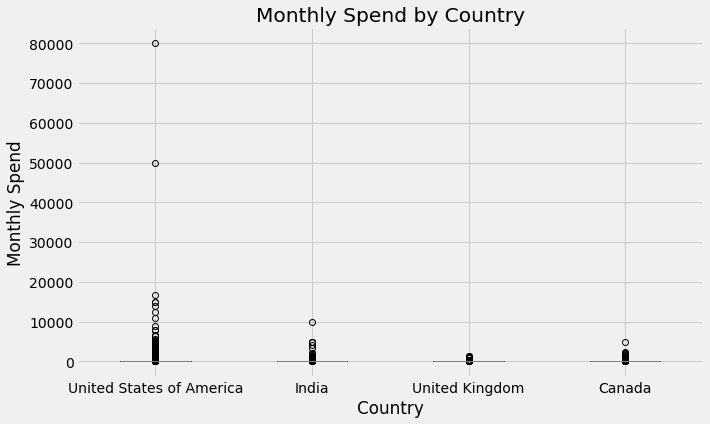

In [72]:
CA = ad_new[ad_new['CountryLive']=='Canada']
USA = ad_new[ad_new['CountryLive']=='United States of America']
UK = ad_new[ad_new['CountryLive']=='United Kingdom']
IND = ad_new[ad_new['CountryLive']=='India']

plt.figure(figsize=(10, 6))

data = [USA['Monthly_spend'], IND['Monthly_spend'], UK['Monthly_spend'], CA['Monthly_spend']]
labels = ['United States of America', 'India', 'United Kingdom', 'Canada']

plt.boxplot(data, labels=labels)

plt.title('Monthly Spend by Country')
plt.xlabel('Country')
plt.ylabel('Monthly Spend')

plt.show()

We can see a lot of extreme outliers, notably from the US and India. Let's get rid of these outliers and keep values less than 15000, this will only get rid of some of the outliers from the US but not from other countries.

### Analyzing outliers of India
Let's try to figure out why some of the respondants of India spend so much on programming.

In [105]:
india = ad_new[(ad_new['Monthly_spend'] > 2000)&(ad_new['CountryLive']=='India')]
india[['AttendedBootcamp', 'BootcampName', 'BootcampFinish',
        'MoneyForLearning', 'MonthsProgramming', 'Monthly_spend','CodeEventConferences']]

,AttendedBootcamp,BootcampName,BootcampFinish,MoneyForLearning,MonthsProgramming,Monthly_spend,CodeEventConferences
1728,0.0,NaN,NaN,20000.0,4.0,5000.000000,NaN
1755,0.0,NaN,NaN,50000.0,15.0,3333.333333,NaN
7989,0.0,NaN,NaN,5000.0,1.0,5000.000000,1.0
8126,0.0,NaN,NaN,5000.0,1.0,5000.000000,NaN
13398,0.0,NaN,NaN,20000.0,2.0,10000.000000,NaN
15587,0.0,NaN,NaN,100000.0,24.0,4166.666667,NaN


This data does not suggest the reason for so many outliers in India, only one of the 6 have attended a coding conference, and none have done a bootcamp.

### Analyzing outliers of USA

In [106]:
United = ad_new[(ad_new['Monthly_spend'] > 8000)&(ad_new['CountryLive']=='United States of America')]
United[['AttendedBootcamp', 'BootcampName', 'BootcampFinish',
        'MoneyForLearning', 'MonthsProgramming', 'Monthly_spend','CodeEventConferences']]

,AttendedBootcamp,BootcampName,BootcampFinish,MoneyForLearning,MonthsProgramming,Monthly_spend,CodeEventConferences
2478,1.0,NaN,0.0,100000.0,2.0,50000.000000,NaN
3184,1.0,We Can Code IT,1.0,9000.0,1.0,9000.000000,NaN
3930,0.0,NaN,NaN,65000.0,6.0,10833.333333,NaN
6805,1.0,Sabio.la,1.0,15000.0,1.0,15000.000000,NaN
7198,0.0,NaN,NaN,70000.0,5.0,14000.000000,1.0
14024,0.0,NaN,NaN,80000.0,1.0,80000.000000,NaN
16650,0.0,NaN,NaN,200000.0,12.0,16666.666667,NaN
16997,0.0,NaN,NaN,12500.0,1.0,12500.000000,NaN
17231,0.0,NaN,NaN,30000.0,2.0,15000.000000,NaN


We can see a couple of the Americans have attended a bootcamp which can contribute to the money for learning.

### Analyzing outliers of Canada

In [107]:
Can = ad_new[(ad_new['Monthly_spend'] > 2000)&(ad_new['CountryLive']=='Canada')]
Can[['AttendedBootcamp', 'BootcampName', 'BootcampFinish',
        'MoneyForLearning', 'MonthsProgramming', 'Monthly_spend','CodeEventConferences']]

,AttendedBootcamp,BootcampName,BootcampFinish,MoneyForLearning,MonthsProgramming,Monthly_spend,CodeEventConferences
6590,1.0,Lighthouse Labs,1.0,14023.0,6.0,2337.166667,NaN
13659,1.0,Bloc.io,0.0,10000.0,2.0,5000.000000,1.0


The highest spenders of Canada have both attended bootcamps which increases their spending.

### Analyzing outliers of UK

In [108]:
UnK = ad_new[(ad_new['Monthly_spend'] > 1000)&(ad_new['CountryLive']=='United Kingdom')]
UnK[['AttendedBootcamp', 'BootcampName', 'BootcampFinish',
        'MoneyForLearning', 'MonthsProgramming', 'Monthly_spend','CodeEventConferences']]

,AttendedBootcamp,BootcampName,BootcampFinish,MoneyForLearning,MonthsProgramming,Monthly_spend,CodeEventConferences
3645,0.0,NaN,NaN,1200.0,1.0,1200.0,NaN
6127,1.0,General Assembly,1.0,10000.0,8.0,1250.0,NaN
8948,1.0,NaN,1.0,7000.0,5.0,1400.0,NaN


Two of the three largest outliers of the UK have both attended bootcamps. Surprisingly, the largest outlier only spent one month programming.

### Get rid of outliers

In [99]:
new_outlier = ad_new[ad_new['Monthly_spend'] < 5000]

In [100]:
## recompute the mean values
countO = new_outlier.groupby(['CountryLive'])
count_per_monthO = pd.DataFrame({'country':countO['CountryLive'].first(),'mean':countO['Monthly_spend'].mean()})
count_per_monthO

,country,mean
CountryLive,,
Afghanistan,Afghanistan,0.000000
Albania,Albania,7.111111
Algeria,Algeria,0.000000
Angola,Angola,116.666667
Anguilla,Anguilla,0.000000
...,...,...
Vanuatu,Vanuatu,0.000000
Venezuela,Venezuela,11.923077
Vietnam,Vietnam,243.324074


In [101]:
top_4_O = count_per_monthO[(count_per_monthO['country']=='United States of America')|
                        (count_per_monthO['country']=='India')|
                        (count_per_monthO['country']=='United Kingdom')|
                        (count_per_monthO['country']=='Canada')]
top_4_O.sort_values(by='mean',ascending=False)

,country,mean
CountryLive,,
United States of America,United States of America,130.639017
Canada,Canada,93.065400
India,India,81.812102
United Kingdom,United Kingdom,45.534443


Now we see that after getting rid of the large outliers, that USA and Canada have the largest mean spending per month.

## Choosing the two best Markets
Now, Lets finalize which two countries are the best for advertisement. One market we will definitely choose is the US, the second choice comes down to either Canada or India.

#### Making new boxplot

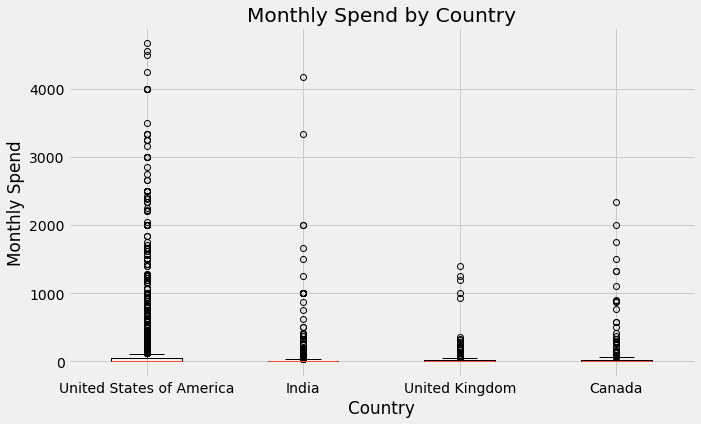

In [103]:
CA2 = new_outlier[new_outlier['CountryLive']=='Canada']
USA2 = new_outlier[new_outlier['CountryLive']=='United States of America']
UK2 = new_outlier[new_outlier['CountryLive']=='United Kingdom']
IND2 = new_outlier[new_outlier['CountryLive']=='India']

plt.figure(figsize=(10, 6))

data = [USA2['Monthly_spend'], IND2['Monthly_spend'], UK2['Monthly_spend'], CA2['Monthly_spend']]
labels = ['United States of America', 'India', 'United Kingdom', 'Canada']

plt.boxplot(data, labels=labels)

plt.title('Monthly Spend by Country')
plt.xlabel('Country')
plt.ylabel('Monthly Spend')

plt.show()

## Best two markets
Since our subscription costs 59 dollars, our main choices are USA, India, and Canada. The UK is out of the picture since they preferrably spend 45 dollars which is less than our subscription. The difference between the mean of Canada and India is very small and they both are well above the 59 dollar price. For this reason the two countries chosen to be advertised to are:

- United States of America
- India

While looking at the data, India has a lot of outlier customers compared to Canada which heavily increased their mean price. Even after getting rid of the outliers, even though Canada's mean price is higher, the difference isn't great enough for consideration.

It is reasonable to split the budget so most of it caters towards the US. This is because in all scenarios. The US had a larger mean monthly spending.